# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv(r'C:\Users\lakshya_hanshvik\Desktop\sb\assingment_statistics\hospital_readmit\data/cms_hospital_readmissions.csv')

In [3]:
hospital_read_df.head()
#hospital_read_df.columns

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


In [4]:
hospital_read_df['Measure Name'].value_counts()

READM-30-COPD-HRRP        3372
READM-30-HF-HRRP          3372
READM-30-PN-HRRP          3372
READM-30-HIP-KNEE-HRRP    3372
READM-30-AMI-HRRP         3372
Name: Measure Name, dtype: int64

****
## Preliminary Analysis

In [5]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\lakshya_hanshvik\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [6]:
clean_hospital_read_df

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15625,FAIRVIEW DEVELOPMENTAL CENTER,50548,CA,READM-30-HF-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15642,WAGONER COMMUNITY HOSPITAL,370166,OK,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15648,ST LUKE'S HOSPITAL AT THE VINTAGE,670075,TX,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15652,SOUTH TEXAS SURGICAL HOSPITAL,670061,TX,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15396,GEORGE L MEE MEMORIAL HOSPITAL,50189,CA,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


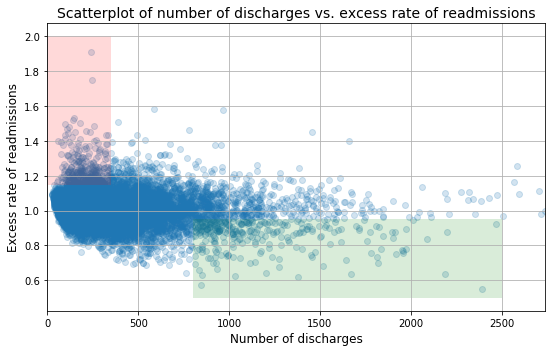

In [7]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

## A. Do you agree with the above analysis and recommendations? Why or why not? 

The above scatter plot , shows that there is a relation between number of discharges and readmission rate, but the plot is not clear ,because there are many data point below 500 number of discharges and they are overlapping.

From the initial observation from the graph we can see that the admission ratio is very high when the number of discharges is less than 500 , and the admission ratio gradually decresed while the number of discharges was going up.

So I agree with the analysis statement.

In [8]:
data = clean_hospital_read_df
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int32
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 1.1+ MB


In [9]:
clean_hospital_read_df['Number of Discharges'][81:-3]

1832       25
1699       27
1774       28
1853       29
1290       30
1602       31
2048       33
2441       34
2512       34
2825       34
3828       35
5125       35
3312       35
2378       35
2670       35
2944       35
1238       36
1395       36
3145       37
3207       37
1471       37
1838       37
4092       37
2252       37
3087       37
4317       38
5309       38
2952       38
3406       38
738        39
         ... 
9359     1990
10370    2011
9462     2032
7147     2042
897      2060
13326    2089
7872     2106
9444     2112
13723    2189
1605     2190
12910    2196
2758     2198
7934     2209
1352     2278
3042     2314
1448     2318
2846     2341
8249     2353
3202     2388
13730    2393
2440     2430
11545    2469
1805     2476
8818     2509
572      2565
136      2581
1698     2596
1242     2705
8126     2716
6643     2740
Name: Number of Discharges, Length: 11494, dtype: int32

In [10]:
data = data[['Number of Discharges','Excess Readmission Ratio']]#,'Predicted Readmission Rate','Expected Readmission Rate','Number of Readmissions']]
data.head()

,Number of Discharges,Excess Readmission Ratio
16857,0,NaN
14582,0,NaN
15606,0,NaN
15615,0,NaN
14551,0,NaN


In [11]:
data.dropna(inplace=True)     # removing the Nan values

data = data[data['Number of Discharges'] <= 3000]  # remove outliers
data = data.sort_values('Number of Discharges')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11494 entries, 1832 to 6643
Data columns (total 2 columns):
Number of Discharges        11494 non-null int32
Excess Readmission Ratio    11494 non-null float64
dtypes: float64(1), int32(1)
memory usage: 224.5 KB


C:\Users\lakshya_hanshvik\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
data.head()

,Number of Discharges,Excess Readmission Ratio
1832,25,1.0914
1699,27,1.0961
1774,28,1.0934
1853,29,1.0908
1290,30,1.1123


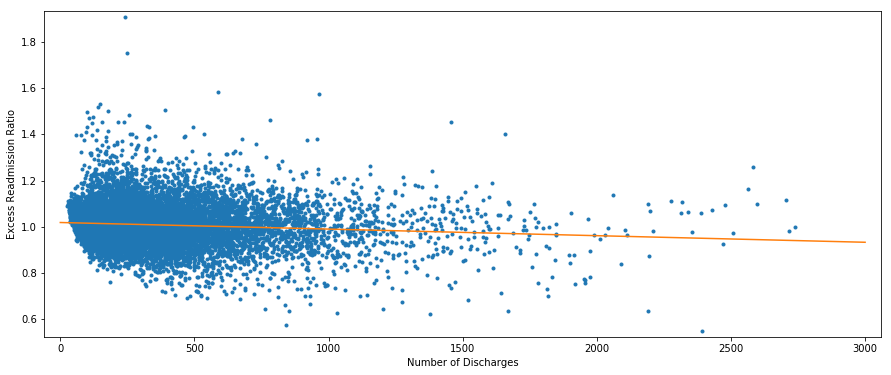

In [13]:
plt.figure(figsize=(15,6))
_ = plt.plot(data['Number of Discharges'], data['Excess Readmission Ratio'],marker='.', linestyle='none')
_ = plt.margins(0.02)
_ = plt.xlabel('Number of Discharges')
_ = plt.ylabel('Excess Readmission Ratio')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(data['Number of Discharges'], data['Excess Readmission Ratio'],1)

# Make theoretical line to plot
x = np.array([0,3000])
y = a*x+b

# Add regression line to your plot
_ = plt.plot(x,y)


# # B


In hospitals with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1. 
In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1.

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?         
   
   
Null Hypothesis : No Correlation between Number of Discharges and Readmission ratio.  (r=0)      
Alternate Hypothesis : Correlations exists between Number of discharges and readmission ratio. (r !=0) 



In [14]:
r= data.corr()
print(r)
print()

                          Number of Discharges  Excess Readmission Ratio
Number of Discharges                  1.000000                 -0.093096
Excess Readmission Ratio             -0.093096                  1.000000



There is a very weak neagative correlation between 'Number of Discharges' and 'Excess Readmission Rate'

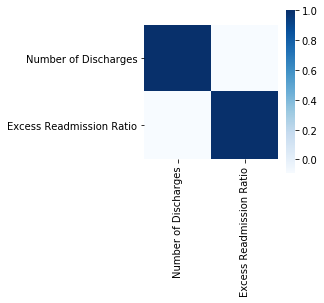

In [15]:
f, ax = plt.subplots(figsize=(3,3))
sns.heatmap(data.corr(), vmax=1, cmap= 'Blues',square=True,ax=ax);
#plt.xticks(rotation=45)

## B


In hospitals with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1. 
In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1.

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?         
   
   
Null Hypothesis : No Correlation between Number of Discharges and Readmission ratio.  (r=0)      
Alternate Hypothesis : Correlations exists between Number of discharges and readmission ratio. (r !=0) 



In [16]:
#  dataframe  with number of discharges<100
df1= data[data['Number of Discharges']<100]      

#  dataframe  with number of discharges >1000
df2 = data[data['Number of Discharges']>1000]

#  dataframe  with number of discharges> 100   and  number of discharges<1000
df3 = data[data['Number of Discharges']<=1000]
df3 = df3[df3['Number of Discharges']>=100]


mean_df1 = round(df1['Excess Readmission Ratio'].mean(),4)
mean_df2 = round(df2['Excess Readmission Ratio'].mean() ,4)
mean_df3 = round(df3['Excess Readmission Ratio'].mean(),4)

df1_percent= (sum(df1['Excess Readmission Ratio'] > 1)/len(df1)) * 100
df2_percent = (sum(df2['Excess Readmission Ratio'] > 1)/len(df2)) * 100

print(" Mean and  Excess Readmission Ratio > 1  for  Number of Discharges <100")
print(mean_df1),
print( df1_percent ) 

print(" Mean and Excess Readmission Ratio > 1  for  Number of Discharges >1000")
print(mean_df2), print(df2_percent)


 Mean and  Excess Readmission Ratio > 1  for  Number of Discharges <100
1.0226
63.215488215488215
 Mean and Excess Readmission Ratio > 1  for  Number of Discharges >1000
0.9791
44.565217391304344


(None, None)

The statistics given are correct,  but they represent a very limited data.There are very few hospitals with                   
Number of Discharges < 100 or >1000. Therefore statistics for lot of data is missing. 

C:\Users\lakshya_hanshvik\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


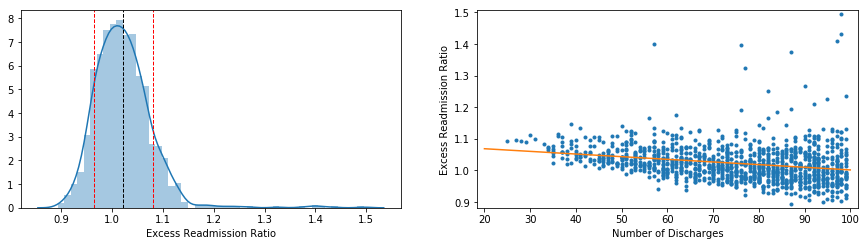

In [17]:
plt.figure(figsize=(15,8))

plt.subplot(2,2,1)
sns.distplot((df1['Excess Readmission Ratio']))
_ = plt.axvline(mean_df1, color='k', linestyle='dashed', linewidth=1)
_ = plt.axvline(mean_df1 +df1['Excess Readmission Ratio'].std(), color='r', linestyle='dashed', linewidth=1)
_ = plt.axvline(mean_df1 -df1['Excess Readmission Ratio'].std(), color='r', linestyle='dashed', linewidth=1)


plt.subplot(2,2,2)
_ = plt.plot(df1['Number of Discharges'], df1['Excess Readmission Ratio'],marker='.', linestyle='none')
_ = plt.margins(0.02)
_ = plt.xlabel('Number of Discharges')
_ = plt.ylabel('Excess Readmission Ratio')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(df1['Number of Discharges'], df1['Excess Readmission Ratio'],1)

# Make theoretical line to plot
x = np.array([20,100])
y = a*x+b

# Add regression line to your plot
_ = plt.plot(x,y)


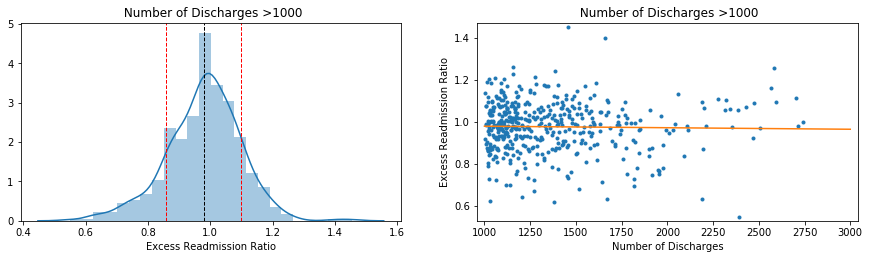

In [18]:
plt.figure(figsize=(15,8))


plt.subplot(2,2,1)
sns.distplot((df2['Excess Readmission Ratio']))
_ = plt.axvline(mean_df2, color='k', linestyle='dashed', linewidth=1)
_ = plt.axvline(mean_df2 + df2['Excess Readmission Ratio'].std(), color='r', linestyle='dashed', linewidth=1)
_ = plt.axvline(mean_df2 - df2['Excess Readmission Ratio'].std(), color='r', linestyle='dashed', linewidth=1)
plt.title(" Number of Discharges >1000")

plt.subplot(2,2,2)
_ = plt.plot(df2['Number of Discharges'], df2['Excess Readmission Ratio'],marker='.', linestyle='none')
_ = plt.margins(0.02)
_ = plt.xlabel('Number of Discharges')
_ = plt.ylabel('Excess Readmission Ratio')
plt.title(" Number of Discharges >1000")

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(df2['Number of Discharges'], df2['Excess Readmission Ratio'],1)

# Make theoretical line to plot
x = np.array([1000,3000])
y = a*x+b

# Add regression line to your plot
_ = plt.plot(x,y)


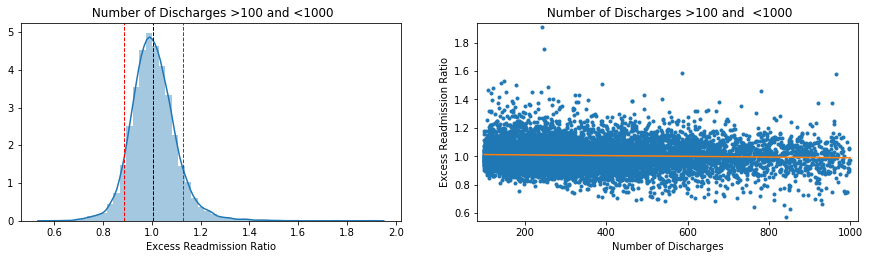

In [19]:
plt.figure(figsize=(15,8))


plt.subplot(2,2,1)
sns.distplot((df3['Excess Readmission Ratio']))
_ = plt.axvline(mean_df3, color='k', linestyle='dashed', linewidth=1)
_ = plt.axvline(mean_df3 + df2['Excess Readmission Ratio'].std(), color='r', linestyle='dashed', linewidth=1)
_ = plt.axvline(mean_df3 - df2['Excess Readmission Ratio'].std(), color='r', linestyle='dashed', linewidth=1)
plt.title(" Number of Discharges >100 and <1000")

plt.subplot(2,2,2)
_ = plt.plot(df3['Number of Discharges'], df3['Excess Readmission Ratio'],marker='.', linestyle='none')
_ = plt.margins(0.02)
_ = plt.xlabel('Number of Discharges')
_ = plt.ylabel('Excess Readmission Ratio')
plt.title(" Number of Discharges >100 and  <1000")

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(df3['Number of Discharges'], df3['Excess Readmission Ratio'],1)

# Make theoretical line to plot
x = np.array([100,1000])
y = a*x+b

# Add regression line to your plot
_ = plt.plot(x,y)


Null hypothesis : There is NO difference between the distribution of Excess Readmission Rates in hospitals with less than 100 discharges and hospitals with more than 1000 discharges, i.e the mean difference between the two populations is 0:
                 P1 = P2

Alternate Hypothesis  :   P1  != P2


In [20]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

In [21]:
# Define two samples


# Compute difference of excess readmission rate from two samples: empirical_diff_means
empirical_diff_means = diff_of_means(df1['Excess Readmission Ratio'], df2['Excess Readmission Ratio'])
print('empirical mean of <100 discharges =', mean_df1)
print('empirical mean of >1000 discharges =', mean_df2)
print('empirical difference in means =', empirical_diff_means)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(df1['Excess Readmission Ratio'],df1['Excess Readmission Ratio'],
                               diff_of_means, size=10000)

# # Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# # Print the result
print('p-value =', p)

empirical mean of <100 discharges = 1.0226
empirical mean of >1000 discharges = 0.9791
empirical difference in means = 0.04354530669008949
p-value = 0.0


As thhe p-value=0, we must therefore reject the null hypothesis that there is no difference in the excess readmission rate for hospitals/facilities with number of discharges < 100 and those > 1000.

Report statistical significance for  𝛼  = .01.

In [22]:
# calculate 95% confidence interval
np.percentile(perm_replicates, [2.5,97.5])

array([-0.00475582,  0.00471258])

   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client? 

Practical significance is defined as the relationships between variables of the real-world applications. A statistical significance shows the probability of the relationship that exists between two or more variables. It takes into account variance and means. It is not necessary for the variables to have statistical significance in order to have practical significance. 

The main difference between practical and statistical significance is that the statistical significance is the result obtained from sample data, whereas the practical significance is the practical application of the obtained results. Practical significance indicates that to be used in the real world the observed effect can be considered as large enough. However, statistical significance due to a chance or variability in the sample is more concerned with the perceived effect.


From the above statistical test ,as the p value is 0 , we rejected the null hypothesis ,i.e there is no difference in the excess readmission rate for hospitals/facilities with number of discharges < 100 and those > 1000. But practically speaking for the hospitals with high capacity may have good experienced doctors and there is a chance to have a better care towards the patients, and therefore readmission ratio can be less.
And also before coming to the conclusion we did not consider the type of treatment " Measure name " in our testing ,
Well I recommend the client , to consider the larger hospital facilities and the doctors before performing the test.


5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.

Advantages : 
    An important advantage of using a scatterplot is that is allows us to visualize the correlation between two continuos variables. In the scatterplot constructed above, it can be clearly seen that there is a very weak negative correlation 

Disadvantage : 
(i) These scatter plot is unable to measure the precise extent of correlation.
(ii) In our case, there was a large amount of overplotting.

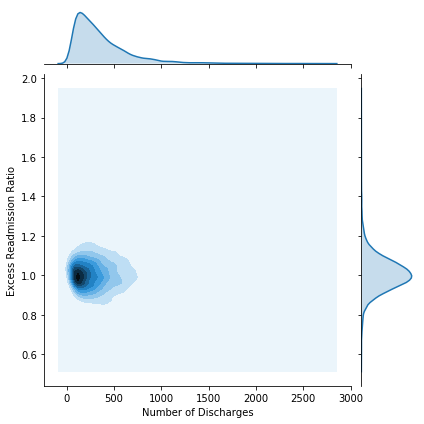

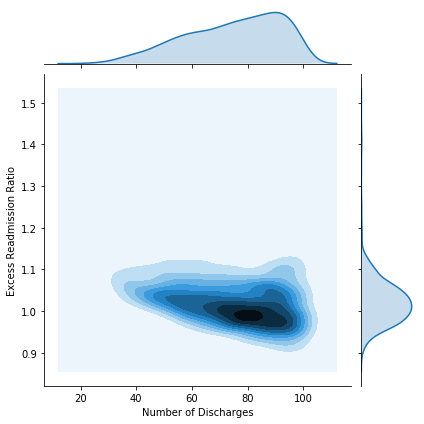

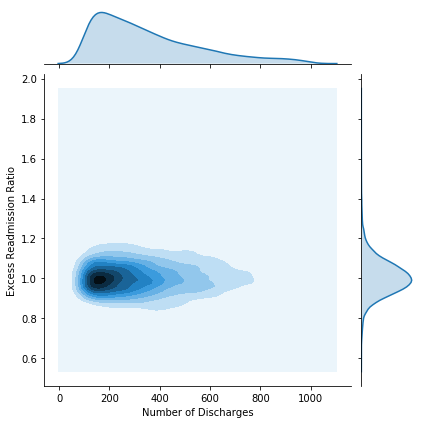

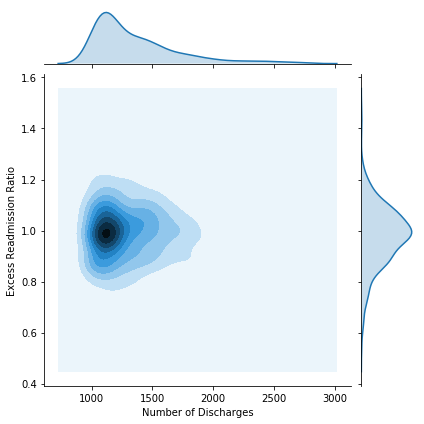

In [23]:

sns.jointplot(data['Number of Discharges'], data['Excess Readmission Ratio'], kind='kde'),

sns.jointplot(df1['Number of Discharges'], df1['Excess Readmission Ratio'], kind='kde')

sns.jointplot(df3['Number of Discharges'], df3['Excess Readmission Ratio'], kind='kde')

sns.jointplot(df2['Number of Discharges'], df2['Excess Readmission Ratio'], kind='kde')

Graphs like this really show us a lot about the data we are examining. We can simultaneously see that the two sets of data are correlated 